In [1]:
import numpy as np
import cupy as cp
import dxchange
import time
import matplotlib.pyplot as plt

from streamtomocupy import config
from streamtomocupy import streamrecon
%matplotlib inline

cp.cuda.set_pinned_memory_allocator(cp.cuda.PinnedMemoryPool().malloc)

astropy module not found
olefile module not found


In [2]:
def get_data_pars(args, proj, flat, dark):
    '''Get parameters of the data'''

    args.nproj = proj.shape[0]
    args.nz = proj.shape[1]
    args.n = proj.shape[2]
    args.nflat = flat.shape[0]
    args.ndark = dark.shape[0]
    args.in_dtype = proj.dtype    
    return args        

In [3]:
# # init parameters with default values. can be done ones
# # config.write_args('test.conf')

# # read parameters
# args = config.read_args('test.conf')

# proj, flat, dark, theta = dxchange.read_aps_32id('/home/beams/TOMO/conda/tomocupy/tests/data/test_data.h5')
# # proj=np.pad(proj,((0,0),(128,128),(256,256)),'edge')
# # flat=np.pad(flat,((0,0),(128,128),(256,256)),'edge')
# # dark=np.pad(dark,((0,0),(128,128),(256,256)),'edge')

# args = get_data_pars(args,proj, flat, dark)

# # streaming reconstruction class
# t = time.time()
# cl_recstream = streamrecon.StreamRecon(args)
# print('Create class, time', time.time()-t)

# res = cl_recstream.get_res()
# st = 0
# end = 22
# args.rotation_axis = -1
# t =time.time()
# cl_recstream.proc_sino(res[0], proj, dark, flat)
# cl_recstream.proc_proj(res[1][:,st:end], res[0][:,st:end])
# cl_recstream.rec_sino(res[2][st:end], res[1][:,st:end], theta)
# print('Manual processing and reconstruction by sinogram and projection chunks, time', time.time()-t)
# print('norm of the result', np.linalg.norm(res[2].astype('float32')))

In [4]:
# init parameters with default values. can be done ones
# config.write_args('test.conf')

# read parameters
args = config.read_args('test.conf')

proj, flat, dark, theta = dxchange.read_aps_32id('/home/beams/TOMO/conda/tomocupy/tests/data/test_data.h5')
proj=np.pad(proj,((0,0),(128,128),(256,256)),'edge')
flat=np.pad(flat,((0,0),(128,128),(256,256)),'edge')
dark=np.pad(dark,((0,0),(128,128),(256,256)),'edge')

args = get_data_pars(args,proj, flat, dark)

# streaming reconstruction class
t = time.time()
cl_recstream = streamrecon.StreamRecon(args)
print('Create class, time', time.time()-t)

# references for intermediate results
res = cl_recstream.get_res()
t = time.time()
cl_recstream.rec(proj, dark, flat, theta)
print('Processing and reconstruction by sinogram chunks, time', time.time()-t)
print('norm of the result', np.linalg.norm(res[2].astype('float32')))

t = time.time()
cl_recstream.rec_steps(proj, dark, flat, theta)
print('Processing and reconstruction by sinogram and projection chunks, time', time.time()-t)
print('norm of the result', np.linalg.norm(res[2].astype('float32')))

t = time.time()
# can change st and end for projection and for slices for each step
# this will allow e.g. for optimal adjustments of the rotation axis and phase retrieval parameters
st = 0
end = 22
args.rotation_axis = -1
cl_recstream.proc_sino(res[0][:,st:end], proj[:,st:end], dark[:,st:end], flat[:,st:end])
cl_recstream.proc_proj(res[1][:,st:end], res[0][:,st:end])
cl_recstream.rec_sino(res[2][st:end], res[1][:,st:end], theta)
print('Manual processing and reconstruction by sinogram and projection chunks, time', time.time()-t)
print('norm of the result', np.linalg.norm(res[2].astype('float32')))

class created
Create class, time 3.277219772338867
Processing and reconstruction by sinogram chunks, time 0.8695118427276611
norm of the result 21.436966
Processing and reconstruction by sinogram and projection chunks, time 1.292558193206787
norm of the result 21.436966
Manual processing and reconstruction by sinogram and projection chunks, time 0.15853476524353027
norm of the result 21.436966


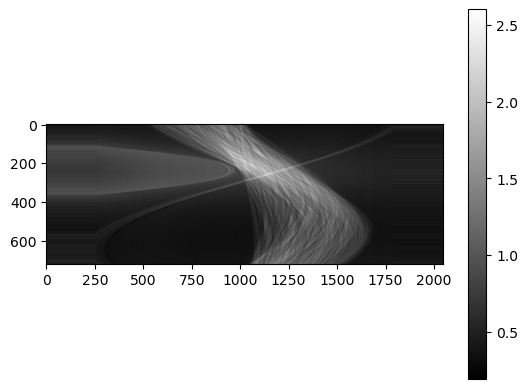

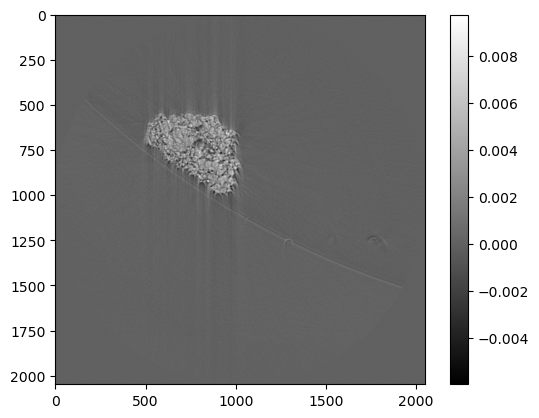

In [5]:
plt.imshow(res[1][:,0],cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(res[2][-1],cmap='gray')
plt.colorbar()
plt.show()